In [1]:
## Based on code snippets at:
#  - https://github.com/biplav-s/course-d2d-ai/blob/main/sample-code/l20-text-overview/FirstLook_ClassSyllabusData.ipynb
#  - https://towardsdatascience.com/standing-out-from-the-cloud-how-to-shape-and-format-a-word-cloud-bf54beab3389

In [2]:
## Install as appropriate
# !pip install wordcloud

In [3]:
# Now we define a function to do word cloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
    

def wordcloud_draw(data, joinlines = 'false', color = 'black'):
    if (joinlines == 'false'): 
        words = ''.join(data)
    else:
        words = ' '.join(data)   
        
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

In [4]:
# Work with some content
# Load from file, url or just copy-paste
# This one from: https://sc.edu/safety/coronavirus/safety_guidelines/index.php
content = "Combating COVID-19 will require an effort from the entire university community, and everyone will be expected to do their part to maintain a clean, safe and healthy environment in which all members of the Gamecock family can live, learn and play. We'll continue to update this information as changes occur."


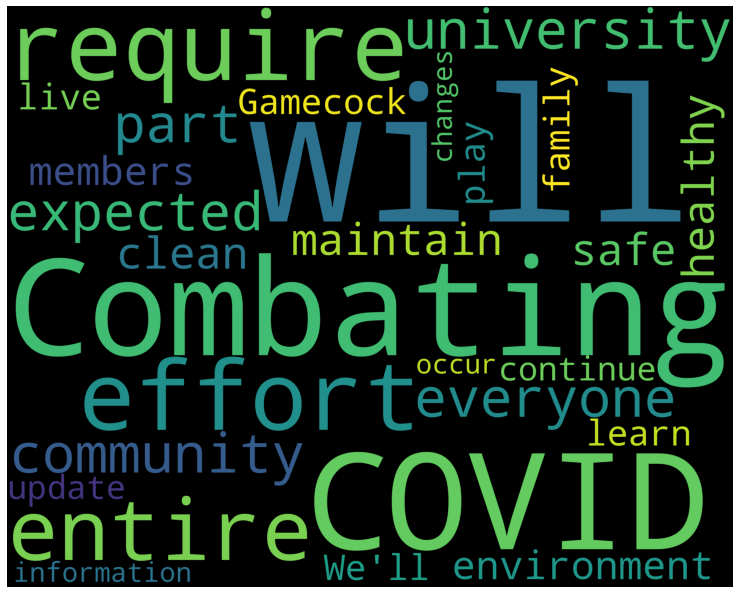

In [5]:
# Draw the visualization
wordcloud_draw(content, joinlines = 'false')

In [6]:
# Breaskfast items from: https://www.healthline.com/nutrition/12-best-foods-to-eat-in-morning
# - stored in ./data/breakfast.txt

# Open file and get content
file = './data/breakfast.txt'
with open(file, 'r') as f:
    content = " ".join(line.rstrip() for line in f)
f.close()

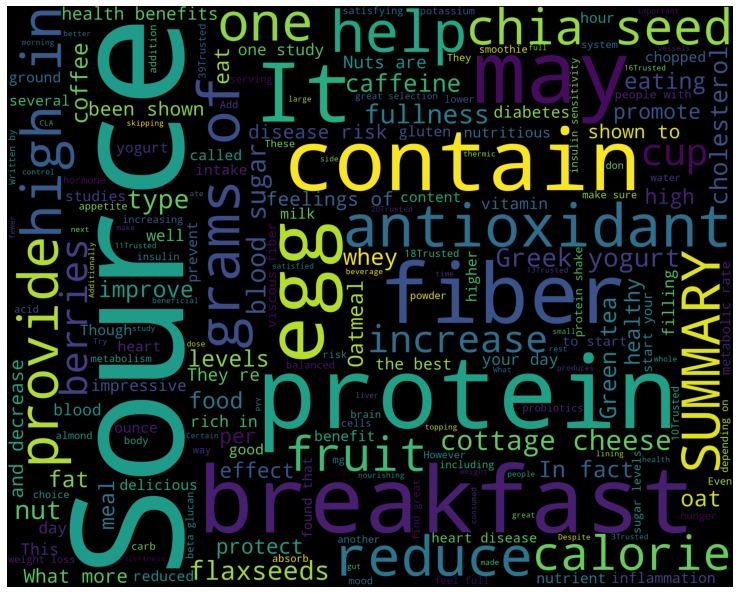

In [7]:
# Draw the visualization
wordcloud_draw(content, joinlines = 'false')

In [8]:
# Do you notice any bias in choice of breakfast items?
# - Do vegetarians only eat seeds?
# - Do you eat anything healthy?

# PDF extraction and word cloud

In [9]:
## Install if needed
#!pip install tika

## Tika also needs Java on machine
# - Download from https://www.oracle.com/java/
# - Check it is there with: "java - version"

In [10]:
# Setup and define function for parsing

# Uncomment if using Tika to convert from .pdf to text
from tika import parser

def convertPdf2TxtWithTika(in_pdf_file):
    # Load a file and extract information
    print ("INFO: - reading file = " + in_pdf_file)
    
    raw = parser.from_file(in_pdf_file)
    text = raw['content']
    
    ## Post-processing explained at: 
    # https://medium.com/@justinboylantoomey/fast-text-extraction-with-python-and-tika-41ac34b0fe61
    # Convert to string
    text = str(text)
    
    return text

In [11]:
file = './data/SCSupremeCourtOpinion.pdf'
content = convertPdf2TxtWithTika(file)
# print (content)

INFO: - reading file = ./data/SCSupremeCourtOpinion.pdf


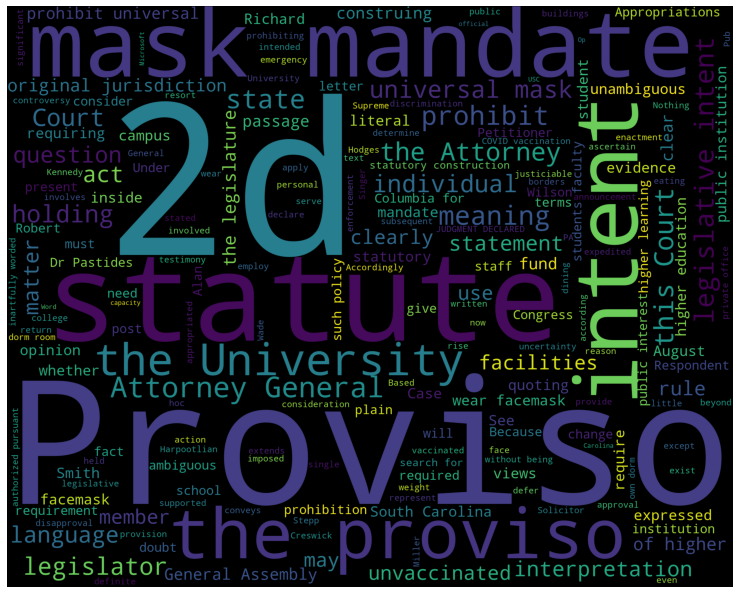

In [12]:
# Draw the visualization
wordcloud_draw(content, joinlines = 'false')